## Gathering 

In [84]:
import requests
import pandas as pd
import json
import time
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', -1)

In [2]:
# Loading the enhanced twitter archive file
tweets_archive = pd.read_csv("twitter-archive-enhanced-2.csv")

In [3]:
# Download the tweet imagae prediction using the request library 

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

# TSV file reading 
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [4]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [6]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API from Json
*I did not resieve the authentication from twitter. I used the file provided from Udacity `tweet_json.txt`.*

In [7]:
# Read the saved tweet_json.txt file into a dataframe
tweets_data = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
df_api = pd.DataFrame(tweets_data, columns=list(tweets_data[0].keys()))

In [8]:
tweet_df = df_api[['id', 'retweet_count', 'favorite_count', ]]
 
tweet_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [9]:
# save the dataframe 
tweet_df.to_csv("tweet_json.csv")

# copy the data to a new cleaned dataframe to start work on it 

tweets_archive_clean = tweets_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_clean = tweet_df.copy()

## Assess

In [10]:
tweets_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
tweets_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
tweets_archive_clean.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
Sadie           8
the             8
Bailey          7
Daisy           7
Buddy           7
Toby            7
an              7
Rusty           6
Scout           6
Koda            6
Milo            6
Stanley         6
Jack            6
Bella           6
Dave            6
Leo             6
Jax             6
Oscar           6
Phil            5
             ... 
Hamrick         1
Christoper      1
Asher           1
Bloo            1
Tug             1
Eugene          1
Fillup          1
Doobert         1
Chef            1
Aiden           1
Pete            1
Timmy           1
Tycho           1
Joshwa          1
Jiminus         1
Shelby          1
Laika           1
Chubbs          1
Lipton          1
Sprinkles       1
Danny           1
Farfle          1
Chadrick        1
Yukon           1
Herb      

In [14]:
tweets_archive_clean.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [15]:
tweets_archive_clean.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [16]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_prediction_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
image_prediction_clean.jpg_url.duplicated().sum()

66

In [19]:
image_prediction_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
1608,800751577355128832,https://pbs.twimg.com/media/CxzXOyBW8AEu_Oi.jpg,2,cocker_spaniel,0.771984,True,miniature_poodle,0.076653,True,toy_poodle,0.039618,True
1087,718939241951195136,https://pbs.twimg.com/media/CfovbK4WIAAkTn3.jpg,1,Pembroke,0.766327,True,Cardigan,0.222126,True,toilet_tissue,0.006757,False
1537,790698755171364864,https://pbs.twimg.com/media/CvkgUjbUsAEvo7l.jpg,1,Bernese_mountain_dog,0.996541,True,EntleBucher,0.001057,True,Appenzeller,0.000998,True
1761,826115272272650244,https://pbs.twimg.com/media/C3bzVILWcAUjS5i.jpg,1,tennis_ball,0.997071,False,golden_retriever,0.002331,True,kuvasz,0.000283,True


In [20]:
image_prediction_clean.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
beagle                        18
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
Rottweiler                    17
Lakeland_terrier              17
Shih-Tzu                      17
Italian_greyhound             16
kuvasz                        16
          

In [21]:
image_prediction_clean.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
toy_terrier                        20
miniature_pinscher                 20
malinois                           20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [22]:
image_prediction_clean.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
b

In [23]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [24]:
tweet_clean.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


## Quality Issues

#### twitter_achive_clean dataset

* timestamp is object, should be datetime instead of object.
* several columns have wrong null object, i.e. None instead of NAN
* in_reply_to_status_id,tweet_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id have wrong data type, should be integers or string instead. 
* delete columns that won't used in analysis
* fix the the wrong ratings and standrize the values
* dog_stage has duplicated  values should be handled

#### image_predictions dataset



* 66 dublicated jpg_url
* missing values from images dataset (2075 rows instead of 2354)

#### tweet_cleen dataset

* rename id to tweet_id for merging purpose

## Tidiness Issues 

* all the datasets should be compined in one dataset
* merge dog stages into one column

#### Define 

rename id to tweet_id for merging purpose

#### Code 

In [25]:
tweet_clean.rename(columns={'id':'tweet_id',
                            'retweet_count_y':'retweet_count',
                            'favorite_count_y':'favorite_count'}, inplace=True)

#### Test

In [26]:
tweet_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


#### Define 

merge the datasets

#### Code 

In [27]:
tweets_archive_clean = pd.merge(left=tweets_archive_clean,
                                 right=tweet_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [28]:
tweets_archive_clean = tweets_archive_clean.merge(image_prediction_clean, on='tweet_id', how='inner')

#### Test

In [29]:
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

#### Define 

Tidiness issue 2 

#### Code 

In [30]:
# extract the dogs names 
tweets_archive_clean['dog_stage'] = tweets_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [31]:
tweets_archive_clean[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(20)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [32]:
# drop the names 
tweets_archive_clean = tweets_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [33]:
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
retweet_count                 2073 non-null int64
favorite_count                2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 non-null int64
p1                            2073 non

### Define 

 removing retweet from dataframe


In [34]:
tweets_archive_clean.drop(tweets_archive_clean[tweets_archive_clean['retweeted_status_id'].notnull()== True].index, inplace= True)


### Test

In [36]:
tweets_archive_clean.shape[0]

1994

#### Define 

delete columns won't use it in the analysis

#### Code 

In [42]:
tweets_archive_clean = tweets_archive_clean.drop('retweeted_status_user_id', 1)
tweets_archive_clean = tweets_archive_clean.drop('retweeted_status_timestamp', 1)
tweets_archive_clean = tweets_archive_clean.drop('in_reply_to_status_id', 1)
tweets_archive_clean = tweets_archive_clean.drop('in_reply_to_user_id', 1)
tweets_archive_clean = tweets_archive_clean.drop('retweet_count_x', 1)
tweets_archive_clean = tweets_archive_clean.drop('favorite_count_x', 1)
tweets_archive_clean = tweets_archive_clean.drop('date_time', 1)
tweets_archive_clean = tweets_archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

In [95]:
tweets_archive_clean.drop(['retweeted_status_id'], axis= 1 , inplace= True)

In [46]:
tweets_archive_clean = tweets_archive_clean.drop('retweeted_status_id', 1)

In [125]:
#tweets_archive_clean.drop(['timestamp'], axis= 1 , inplace= True)

#### Test

In [48]:
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 12 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
dog_stage             326 non-null object
dtypes: int64(5), object(7)
memory usage: 202.5+ KB


#### Define 

change tweet_id to object 

#### Code 

In [114]:
tweets_archive_clean['tweet_id'] = tweets_archive_clean['tweet_id'].astype(str)
tweets_archive_clean['rating_numerator'] = tweets_archive_clean['rating_numerator'].astype(float)

#### Test

In [112]:
tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 15 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null category
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null object
rating_denominator    1994 non-null int64
name                  1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
dog_stage             326 non-null object
date                  1994 non-null object
time                  1994 non-null object
rating                1994 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 315.7+ KB


#### Define 

change the timestamp to datetime 

#### Code 

In [51]:
tweets_archive_clean['timestamp'] = pd.to_datetime(tweets_archive_clean['timestamp'])
tweets_archive_clean['date'] = tweets_archive_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
tweets_archive_clean['time'] = tweets_archive_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

#### Test

In [52]:
tweets_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,date,time
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,08-01-2017,16:23
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,NaN,08-01-2017,00:17
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,NaN,07-31-2017,00:18
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,07-30-2017,15:58
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,NaN,07-29-2017,16:00


#### Define 

drop dublicated jpg_url

#### Code 

In [53]:
tweets_archive_clean = tweets_archive_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [54]:
sum(tweets_archive_clean['jpg_url'].duplicated())

0

#### Define

Fix names.

In [55]:
tweets_archive_clean['name'][tweets_archive_clean['name'].str.match('[a-z]+')] = 'None'

/Users/MOHAMMED-MAC/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
tweets_archive_clean.name.value_counts()

None        644
Charlie      11
Cooper       10
Lucy         10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Winston       8
Daisy         7
Lola          7
Toby          7
Bo            6
Koda          6
Jax           6
Stanley       6
Bella         6
Bailey        5
Chester       5
Rusty         5
Milo          5
Dave          5
Buddy         5
Oscar         5
Louis         5
Leo           5
Scout         5
Brody         4
Gary          4
Larry         4
           ... 
Mingus        1
Karl          1
Strider       1
Jaspers       1
Danny         1
Chef          1
Bertson       1
Chubbs        1
Cecil         1
Dot           1
Hanz          1
Bell          1
Rontu         1
Ito           1
Al            1
Mattie        1
Gilbert       1
Bluebert      1
Acro          1
Moreton       1
Aiden         1
Trip          1
Pete          1
Timmy         1
Tycho         1
Joshwa        1
Jiminus       1
Shelby        1
Laika         1
Leonidas      1
Name: name, Length: 914,

### Define 

problem the source field

In [57]:
tweets_archive_clean.source = tweets_archive_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [58]:
tweets_archive_clean.source = tweets_archive_clean.source.astype('category')

### Test

In [59]:
tweets_archive_clean.source.value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### Define 

some columns has wrong ratings

### Code

In [74]:
regex_expression = r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)"
 
fix_rating = tweets_archive_clean[tweets_archive_clean.text.str.contains(r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

fix_rating

/Users/MOHAMMED-MAC/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


616     "Yep... just as I suspected. You're not flossi...
825     This is Bookstore and Seaweed. Bookstore is ti...
876     After so many requests, this is Bretagne. She ...
967     Happy 4/20 from the squad! 13/10 for all https...
1001    This is Bluebert. He just saw that both #Final...
1017    Meet Travis and Flurp. Travis is pretty chill ...
1139    This is Socks. That water pup w the super legs...
1229    This may be the greatest video I've ever been ...
1234    Meet Oliviér. He takes killer selfies. Has a d...
1269    When bae says they can't go out but you see th...
1284    This is Eriq. His friend just reminded him of ...
1295    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1405    This is Darrel. He just robbed a 7/11 and is i...
1527    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1561    These two pups just met and have instantly bon...
1623    Meet Rufio. He is unaware of the pink legless ...
1627    Two gorgeous dogs here. Little waddling dog is...
1692    Meet E

In [81]:
tweets_archive_clean['rating'] = tweets_archive_clean['rating_numerator'] / tweets_archive_clean['rating_denominator']

In [82]:
for i in fix_rating:
    mask = tweets_archive_clean.text == i
    tweets_archive_clean.loc[mask, 'rating_numerator'] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", i)
    tweets_archive_clean.loc[mask, 'rating_denominator'] = 10

### Test

In [121]:
tweets_archive_clean[tweets_archive_clean.text.isin(fix_rating)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,date,time,rating
616,777684233540206592,2016-09-19 01:42:24,Twitter for iPhone,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",https://twitter.com/dog_rates/status/777684233540206592/photo/1,11.0,10,None,3403,12518,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,NaN,09-19-2016,01:42,1.1
825,747600769478692864,2016-06-28 01:21:27,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"https://twitter.com/dog_rates/status/747600769478692864/photo/1,https://twitter.com/dog_rates/status/747600769478692864/photo/1",7.0,10,Bookstore,619,2545,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,NaN,06-28-2016,01:21,0.7
876,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14.0,10,None,9220,20648,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,NaN,06-08-2016,02:41,1.4
967,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,13.0,10,None,1764,4493,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,NaN,04-21-2016,02:25,1.3
1001,716439118184652801,2016-04-03 01:36:11,Twitter for iPhone,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,11.0,10,Bluebert,247,2574,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,NaN,04-03-2016,01:36,1.1
1017,714258258790387713,2016-03-28 01:10:13,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10\nget it together Flurp https://t.co/Akzl5ynMmE,https://twitter.com/dog_rates/status/714258258790387713/photo/1,8.0,10,Travis,808,3281,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,NaN,03-28-2016,01:10,0.8
1139,703356393781329922,2016-02-26 23:10:06,Twitter for iPhone,This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf,https://twitter.com/dog_rates/status/703356393781329922/photo/1,2.0,10,Socks,429,2085,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,NaN,02-26-2016,23:10,0.2
1229,695064344191721472,2016-02-04 02:00:27,Twitter for iPhone,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",https://twitter.com/dog_rates/status/695064344191721472/video/1,13.0,10,None,685,1771,https://pbs.twimg.com/ext_tw_video_thumb/695064251149508610/pu/img/0OPED0aUurb9Z16a.jpg,NaN,02-04-2016,02:00,1.3
1234,694352839993344000,2016-02-02 02:53:12,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 5/10 https://t.co/6NgsQJuSBJ,"https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1,https://twitter.com/dog_rates/status/694352839993344000/photo/1",5.0,10,Oliviér,700,2244,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,NaN,02-02-2016,02:53,0.5
1269,691483041324204033,2016-01-25 04:49:38,Twitter for iPhone,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk

### Define

some rating have wrong intries like 75, 13,....

In [93]:
tweets_archive_clean[tweets_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/Users/MOHAMMED-MAC/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,date,time,rating
40,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",11.26,10,Bella,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,NaN,07-08-2017,00:28,0.5
558,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,7069,20296,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,NaN,10-13-2016,23:23,7.5
614,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,1885,7320,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,NaN,09-20-2016,00:24,2.7
1451,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,542,1879,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,pupper,12-25-2015,21:06,2.6


In [95]:
tweets_archive_clean.loc[40, 'rating_numerator'] = 13.5
tweets_archive_clean.loc[558, 'rating_numerator'] = 9.75
tweets_archive_clean.loc[614, 'rating_numerator'] = 11.27
tweets_archive_clean.loc[1451, 'rating_numerator'] = 11.26

In [ ]:
tweets_archive_clean.loc['rating_numerator'] = 11.26

### Test

In [96]:
tweets_archive_clean[tweets_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/Users/MOHAMMED-MAC/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,date,time,rating
40,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.5,10,Bella,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,NaN,07-08-2017,00:28,0.5
558,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,7069,20296,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,NaN,10-13-2016,23:23,7.5
614,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,1885,7320,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,NaN,09-20-2016,00:24,2.7
1451,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,None,542,1879,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,pupper,12-25-2015,21:06,2.6


In [101]:
tweets_archive_clean.to_csv('twitter_archive_master.csv', index= False)

### Define 

outliers in the ratinges 

In [102]:
tweets_archive_clean.query('rating > 30')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,date,time,rating
802,749981277374128128,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776,10,Atticus,2772,5569,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,NaN,07-04-2016,15:00,177.6
1795,670842764863651840,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,4324,7989,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,NaN,11-29-2015,05:52,42.0


In [106]:
tweets_archive_clean.loc[802, 'rating'] = 13.5
tweets_archive_clean.loc[1795, 'rating'] = 13.5

### Test

In [107]:
tweets_archive_clean.query('rating > 30')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,date,time,rating


## Visualizing & Analysing Data

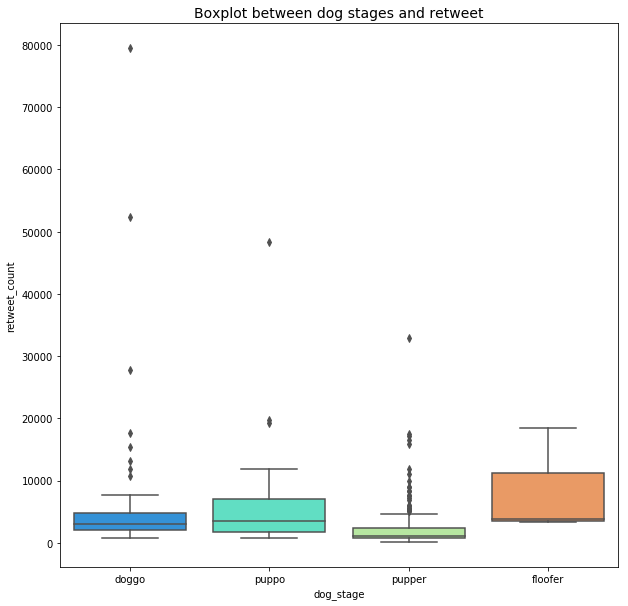

In [97]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x='dog_stage',y='retweet_count',data= tweets_archive_clean,palette='rainbow')
g.axes.set_title('Boxplot between dog stages and retweet', fontsize=14);

the graph above shows the floofer has the highest retweets

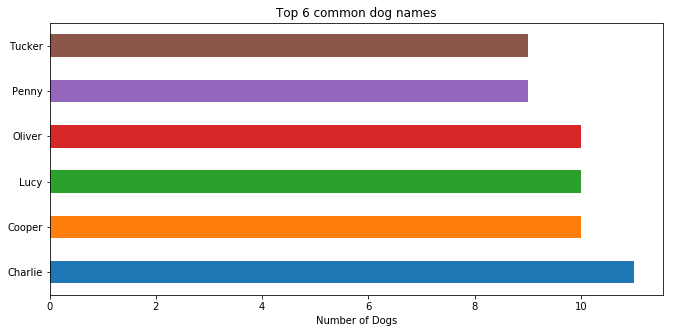

In [98]:
tweets_archive_clean.name.value_counts()[1:7].plot('barh', figsize=(11,5), title='Top 6 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')

Charlie is the most commen name among dogs

Text(0.5,1,'Retweets and favorites Scatter plot')

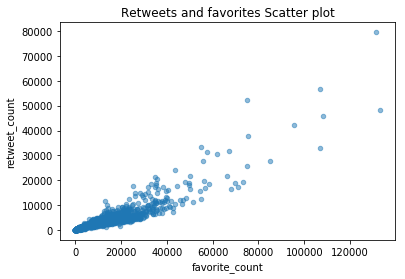

In [99]:
tweets_archive_clean.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('Retweets and favorites Scatter plot')

The coleration between retweets and favorites are strong 

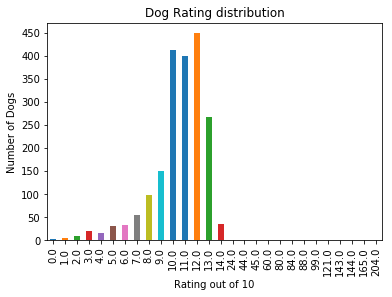

In [120]:
ax = tweets_archive_clean.rating_numerator.value_counts().sort_index().plot('bar', title = 'Dog Rating distribution')
ax.set_xlabel("Rating out of 10")
ax.set_ylabel("Number of Dogs")
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450])
plt.savefig('rating_dist')

In [72]:
tweets_archive_clean['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

Most using source is Twitter for iPhone

In [73]:
tweets_archive_clean['retweet_count'].describe()

count     1994.000000
mean      2766.753260
std       4674.698447
min         16.000000
25%        624.750000
50%       1359.500000
75%       3220.000000
max      79515.000000
Name: retweet_count, dtype: float64